In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1- Intoduction


# Reading the data set

In [140]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv',sep=',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### This data set contains data for 110.527 medical appointments its 14 associated variables (PatientId, AppointmentID, Gender,  Age, Neighbourhood, Scholarship, Hipertension, Diabetes,Alcoholism, Handcap, SMS_received,No-show) in Brazil. No-show variable shows which the patient showed up for the appointment or not, so 'Yes' mean that the patient did not show for the appointment. moreover, for more information over the scholaship, please visit this website (https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)



# 2- Seting questions that I will address during my analysis

#1-which area most has no show
#2-is the gender and age affect the no show
#3-how long between scheduleday and appointmentday and does it affect the result
#4-does people who does not recieve scholarship show more 'no show'
#5-does receving sms affects 'no show'
#6-are these feathures (Hipertension,Diabetes,Alcoholism,Handcap) affect the 'no show' result

# 3- Data Wrangling
# Assessing the data

#1- number of rows and columnes
#2- data types
#3- number of duplicated rows
#4- number of missing values
#5- number of uniques values

In [141]:
#How many rows and columes 
df.shape

(110527, 14)

In [142]:
#features and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [143]:
#number of deplicated rows
sum(df.duplicated())

0

In [144]:
#uniques values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [145]:
#Handcap has 5 values instead of 2
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [146]:
#is there nodata values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Preparing the data

#1- rename all columnes with the same formate
#2- change the time from object to time
#3- extract no show data only
#4- remove unnecessary columnes
#5- add new columnes

In [147]:
#rename
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [148]:
#change the time from object to time
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [149]:
#extracting no show data only
df_yes=df.query("no_show== 'Yes'")

In [150]:
# difference between schedul time and appointment
df['difference_days']= df['appointmentday'].dt.date-df['scheduledday'].dt.date
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,difference_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [151]:
#check some rows which as differences more than 30 days
df.iloc[110518]

patientid                        7.26331e+13
appointmentid                        5630375
gender                                     F
scheduledday       2016-04-27 15:15:06+00:00
appointmentday     2016-06-07 00:00:00+00:00
age                                       50
neighbourhood                    MARIA ORTIZ
scholarship                                0
hipertension                               0
diabetes                                   0
alcoholism                                 0
handcap                                    0
sms_received                               1
no_show                                   No
difference_days             41 days 00:00:00
Name: 110518, dtype: object

In [152]:
# Creating a Function to remove columns
def remove_columns(columns):
    return df.drop(columns=columns, inplace=True)

# Calling the above function to remove 'Appointment_id'
remove_columns('appointmentid')
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,difference_days
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


# 4- Exploring with visuals

#1- exploring no_show variable
#2- exploring gender variable
#3- exploring age variable
#4- exploring the differences between scheduled date and appointment date
#5- exploring the patient ages and handcap degree ( 2d explorations )


In [171]:
# Creating a Function to count number of noshow and show
def new(key1,key2):
    return df.groupby(key1)[key2].count().plot(kind='bar')


Text(0.5, 1.0, 'Number of show and no-show appointments')

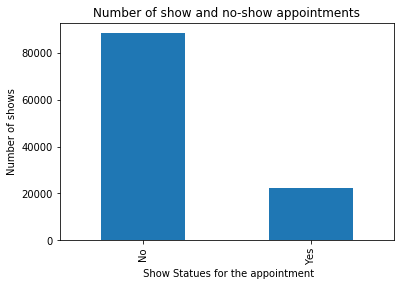

In [172]:
#number of nonshow
new('no_show','patientid')
plt.ylabel('Number of shows')
plt.xlabel(' Show Statues for the appointment')
plt.title ('Number of show and no-show appointments')

Text(0.5, 1.0, 'Number of male and female patients')

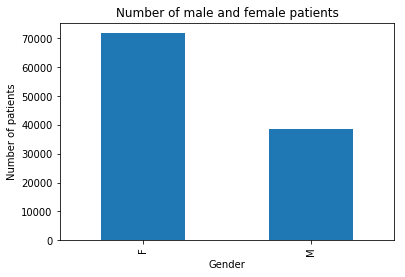

In [173]:
#number of male and female patients
new('gender','patientid')
plt.ylabel('Number of patients')
plt.xlabel('Gender')
plt.title ('Number of male and female patients')

Text(0.5, 1.0, 'Distribution of patients ages')

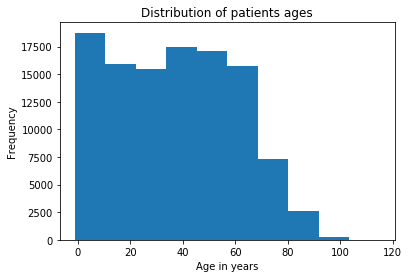

In [155]:
#exploring the range of ages

df['age'].plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Age in years')
plt.title ('Distribution of patients ages')


Text(0.5, 1.0, 'Exploring the patient ages and handcap degree')

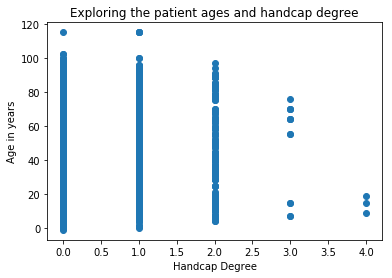

In [156]:
#Exploring the patient ages and handcap degree ( 2d explorations )
plt.scatter(df['handcap'], df['age'])
plt.xlabel('Handcap Degree')
plt.ylabel ('Age in years')
plt.title('Exploring the patient ages and handcap degree')



# 5- Drawing Conclusions 

no_show  gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: patientid, dtype: int64

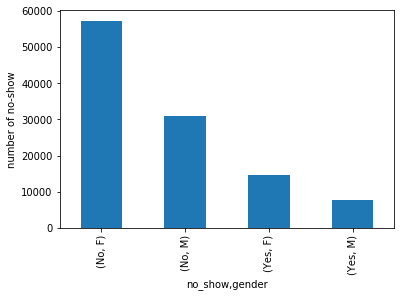

In [157]:
#relation between gender and statues
df_gender= df.groupby(['no_show','gender'])['patientid'].count()
df_gender.plot(kind='bar')
plt.ylabel('number of no-show')
plt.savefig('relation between gender and statues.png')
df_gender

female patients showed show and no-show higher than male patients. number of male and female patients who did not show to their appointments are less than patients who did show for their appointment

In [158]:
# Creating a Function to count number of noshow
def relation(variable,level):
    return df_yes.groupby(variable)[level].count()


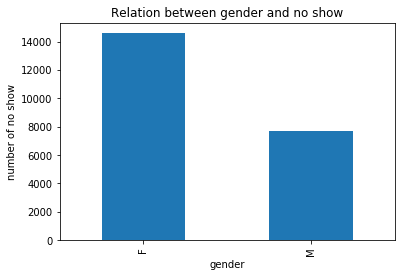

In [159]:
#relation between gender and no show
# Calling the above function count number of no show
relation('gender','patientid').plot(kind= 'bar')
plt.ylabel('number of no show')
plt.title('Relation between gender and no show')
plt.savefig('Relation between gender and no show.png')


14594 female patients did not showed up to their appointments regarding 7725 male patients. Hence, female patients showed no-show higher than male patients.     

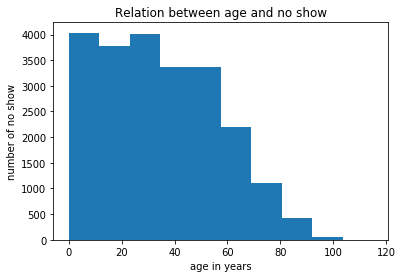

In [160]:
#relation between age and no show
df_yes['age'].plot(kind='hist')
plt.ylabel('number of no show')
plt.xlabel('age in years')

plt.title('Relation between age and no show')
plt.savefig('Relation between age and no show.png')


People from 0 to 35 years old show more “no-show” than older people.

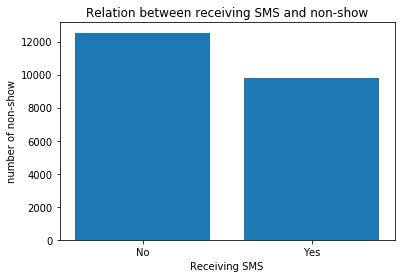

In [161]:
#relation between receving sms with the data and no show
# Calling the above function count number of no show
plt.bar([1,2],relation('sms_received','patientid'),tick_label=['No','Yes'])
plt.xlabel('Receiving SMS')
plt.ylabel('number of non-show')
plt.title('Relation between receiving SMS and non-show');
plt.savefig('Relation between receiving SMS and non-show.png')


People who received SMS show more than people who do not receive SMS

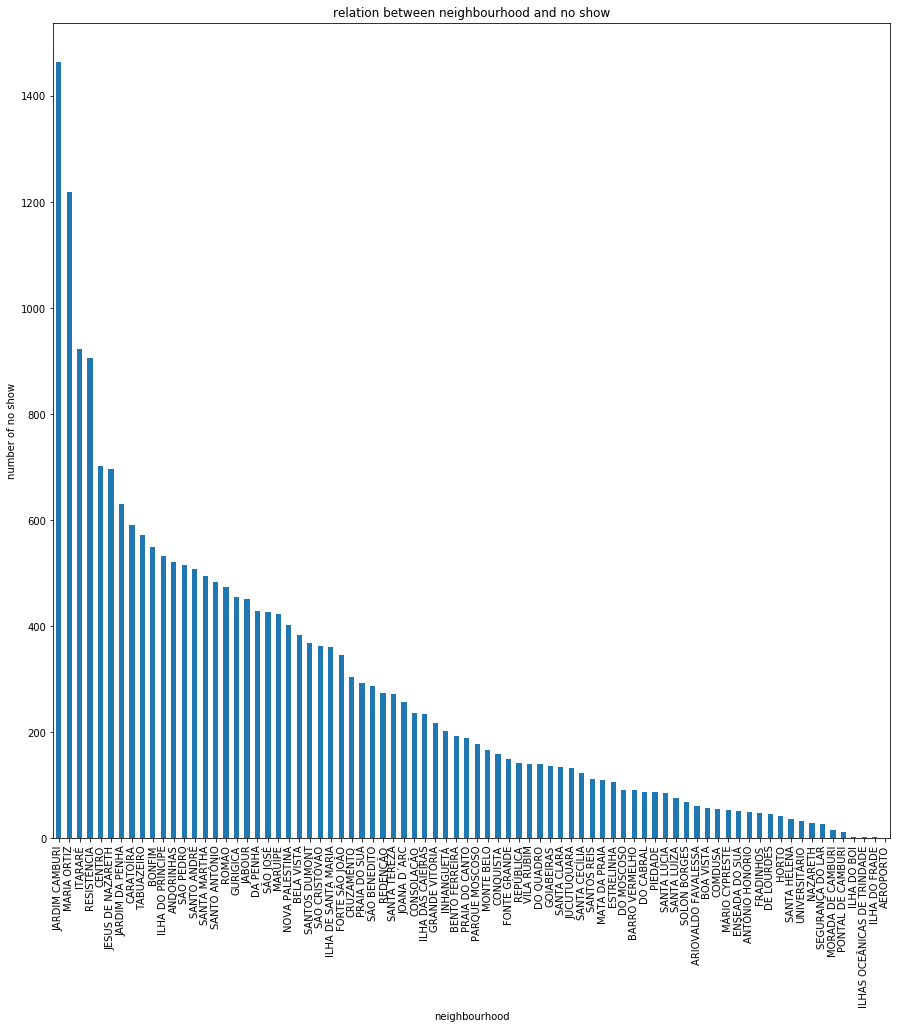

In [162]:
#which area receive much no show
relation('neighbourhood','patientid').sort_values(ascending=False).plot(kind='bar',figsize=(15,15))
plt.ylabel('number of no show')
plt.title ('relation between neighbourhood and no show')
plt.savefig('relation between neighbourhood and no show.png')

Neighbourhood:
JARDIM CAMBURI(1465),
MARIA ORTIZ                    (1219),
ITARARÉ                         (923),
RESISTÊNCIA                    (906),
CENTRO                          (703)

People from these neighborhoods show “no show” more than other neighborhoods. However, there is no additional information about these neighbourhoods for advanced analysis.


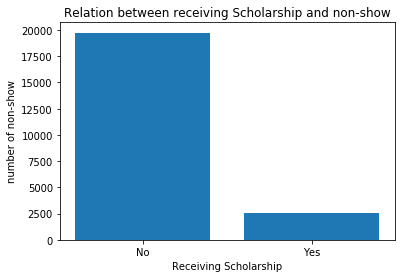

In [163]:
#relation between scholarship and no show
plt.bar([1,2],relation('scholarship','patientid'),tick_label=['No','Yes'])
plt.xlabel('Receiving Scholarship')
plt.ylabel('number of non-show')
plt.title('Relation between receiving Scholarship and non-show');
plt.savefig('Relation between receiving Scholarship and non-show.png')


People who do not receive scholarship show more “no show” than people who receive scholarship

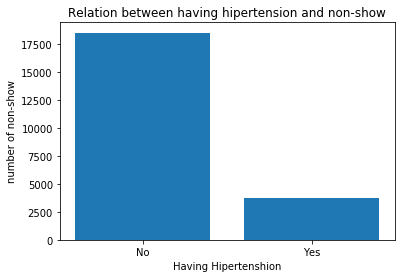

In [164]:
#relation between hipertension and no show
plt.bar([1,2],relation('hipertension','patientid'),tick_label=['No','Yes'])
plt.xlabel('Having Hipertenshion')
plt.ylabel('number of non-show')
plt.title('Relation between having hipertension and non-show');
plt.savefig('Relation between having hipertension and non-show.png')

People who have hypertension show less “no show” than people who have it

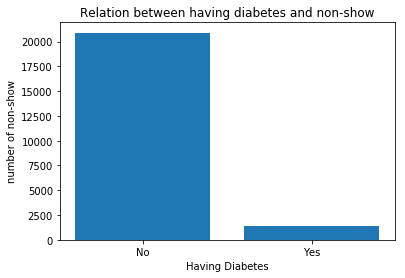

In [165]:
#relation between diabetes and no show
plt.bar([1,2],relation('diabetes','patientid'),tick_label=['No','Yes'])
plt.xlabel('Having Diabetes')
plt.ylabel('number of non-show')
plt.title('Relation between having diabetes and non-show');
plt.savefig('Relation between having diabetes and non-show.png')

People who have diabetes show less “no show” than people who have it

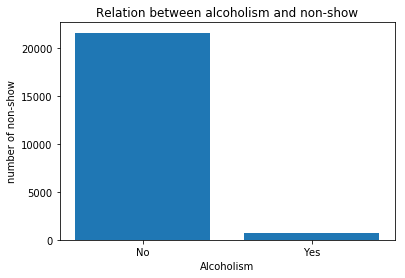

In [166]:
#relation between alcoholism and no show
plt.bar([1,2],relation('alcoholism','patientid'),tick_label=['No','Yes'])
plt.xlabel('Alcoholism')
plt.ylabel('number of non-show')
plt.title('Relation between alcoholism and non-show');
plt.savefig('Relation between alcoholism and non-show.png')

People who are alcoholism show less “no show” than people who have it

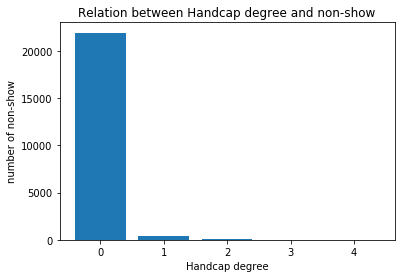

In [167]:
#relation between handcap and no show
plt.bar([1,2,3,4,5],relation('handcap','patientid'),tick_label=['0','1','2','3','4'])
plt.xlabel('Handcap degree')
plt.ylabel('number of non-show')
plt.title('Relation between Handcap degree and non-show');
plt.savefig('RRelation between Handcap degree and non-show.png')

People who are not hand cap show “no show” to appointments more than people who are hand cap

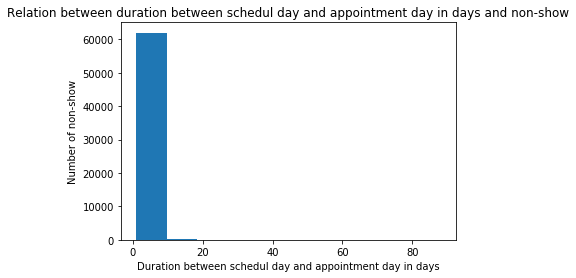

In [168]:
#relation between the differences between scheduled date and appointment date and the no show 

df.groupby('patientid')['difference_days'].count().plot(kind='hist')
plt.ylabel('Number of non-show')
plt.xlabel('Duration between schedul day and appointment day in days')

plt.title('Relation between duration between schedul day and appointment day in days and non-show');
plt.savefig('duration.png')

Most od “no -show” appointments were in the duration between 0 and 10 days. moreover, the differences between schedul and appiontment dates do not impact the no-show numbers

# 6- Conclusions

#•	Number of males that did not show up for the appointments is less than the female’s number
#•	People with the age range from 0 to 40 years showed higher no show for their appointments regards order people.
#•	There is a big difference between people who does not receive scholarship and did not show up and people who receive scholarship and did not show up.
#•	people who did not receive SMS before their appointments showed higher no show than people who received SMS and did not show up.
#•	Some areas such as (JARDIM CAMBURI, MARIA ORTIZ) significantly showed higher no show than other areas.
#•	People with diseases such as (have diabetes, hypertension, hand cap, alcoholism) showed less no-show regarding health people.
#•	The difference between the schedule date and the appointment date does not have significant impact on no show data


# 7- Limitations

There is a couple of limitations that obstacle our analysis:
#•	Most of the variables are categorical data which limit the ability to analysis them.
#•	Conclusions based on relations between different variables cannot be drawn as the most of variables were categorical data.
